## Predicting Survival on the Titanic

### History
Perhaps one of the most infamous shipwrecks in history, the Titanic sank after colliding with an iceberg, killing 1502 out of 2224 people on board. Interestingly, by analysing the probability of survival based on few attributes like gender, age, and social status, we can make very accurate predictions on which passengers would survive. Some groups of people were more likely to survive than others, such as women, children, and the upper-class. Therefore, we can learn about the society priorities and privileges at the time.

### Assignment:

Build a Machine Learning Pipeline, to engineer the features in the data set and predict who is more likely to Survive the catastrophe.

Follow the Jupyter notebook below, and complete the missing bits of code, to achieve each one of the pipeline steps.

In [1]:
import re

# to handle datasets
import pandas as pd
import numpy as np

# for visualization
import matplotlib.pyplot as plt

# to divide train and test set
from sklearn.model_selection import train_test_split

# feature scaling
from sklearn.preprocessing import StandardScaler

# to build the models
from sklearn.linear_model import LogisticRegression

# to evaluate the models
from sklearn.metrics import accuracy_score, roc_auc_score

# to persist the model and the scaler
import joblib

# to visualise al the columns in the dataframe
pd.pandas.set_option('display.max_columns', None)

## Prepare the data set

In [2]:
# load the data - it is available open source and online

data = pd.read_csv('https://www.openml.org/data/get_csv/16826755/phpMYEkMl')

# display data
data.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29,0,0,24160,211.3375,B5,S,2,?,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.55,C22 C26,S,11,?,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2,1,2,113781,151.55,C22 C26,S,?,?,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30,1,2,113781,151.55,C22 C26,S,?,135,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25,1,2,113781,151.55,C22 C26,S,?,?,"Montreal, PQ / Chesterville, ON"


In [4]:
# replace interrogation marks by NaN values

data = data.replace('?', np.nan)

In [5]:
# retain only the first cabin if more than
# 1 are available per passenger

def get_first_cabin(row):
    try:
        return row.split()[0]
    except:
        return np.nan
    
data['cabin'] = data['cabin'].apply(get_first_cabin)

In [6]:
# extracts the title (Mr, Ms, etc) from the name variable

def get_title(passenger):
    line = passenger
    if re.search('Mrs', line):
        return 'Mrs'
    elif re.search('Mr', line):
        return 'Mr'
    elif re.search('Miss', line):
        return 'Miss'
    elif re.search('Master', line):
        return 'Master'
    else:
        return 'Other'
    
data['title'] = data['name'].apply(get_title)

In [7]:
# cast numerical variables as floats

data['fare'] = data['fare'].astype('float')
data['age'] = data['age'].astype('float')

In [8]:
# drop unnecessary variables

data.drop(labels=['name','ticket', 'boat', 'body','home.dest'], axis=1, inplace=True)

# display data
data.head()

,pclass,survived,sex,age,sibsp,parch,fare,cabin,embarked,title
0,1,1,female,29.0000,0,0,211.3375,B5,S,Miss
1,1,1,male,0.9167,1,2,151.5500,C22,S,Master
2,1,0,female,2.0000,1,2,151.5500,C22,S,Miss
3,1,0,male,30.0000,1,2,151.5500,C22,S,Mr
4,1,0,female,25.0000,1,2,151.5500,C22,S,Mrs


In [9]:
# save the data set

data.to_csv('titanic.csv', index=False)

In [2]:
# lcx: read from the saved file
data = pd.read_csv('titanic.csv')
data.head(2)

,pclass,survived,sex,age,sibsp,parch,fare,cabin,embarked,title
0,1,1,female,29.0000,0,0,211.3375,B5,S,Miss
1,1,1,male,0.9167,1,2,151.5500,C22,S,Master


## Data Exploration

### Find numerical and categorical variables

In [4]:
target = 'survived'

In [10]:
# vars_num = # fill your code here

# vars_cat = # fill your code here

vars_num = [x for x in data.dtypes.index if data.dtypes[x] != 'O']
vars_cat = [x for x in data.dtypes.index if data.dtypes[x] == 'O']

print('Number of numerical variables: {}'.format(len(vars_num)))
print('Number of categorical variables: {}'.format(len(vars_cat)))

Number of numerical variables: 6
Number of categorical variables: 4


### Find missing values in variables

In [11]:
# first in numerical variables

vars_num_na = [var for var in data.columns 
               if data[var].dtype != 'O'
               and data[var].isnull().sum() > 0]

data[vars_num_na].isnull().mean()

age     0.200917
fare    0.000764
dtype: float64

In [12]:
# now in categorical variables

vars_cat_na = [var for var in data.columns 
               if data[var].dtype == 'O'
               and data[var].isnull().sum() > 0]

data[vars_cat_na].isnull().mean()

cabin       0.774637
embarked    0.001528
dtype: float64

### Determine cardinality of categorical variables

In [11]:
for var in vars_cat :
    print(var , ", cardinality: ", data[var].unique().size)

sex , cardinality:  2
cabin , cardinality:  182
embarked , cardinality:  4
title , cardinality:  5


In [13]:
# a better way
data[vars_cat].nunique() # dropna = True by default

sex           2
cabin       181
embarked      3
title         5
dtype: int64

### Determine the distribution of numerical variables

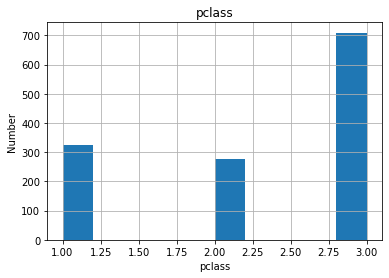

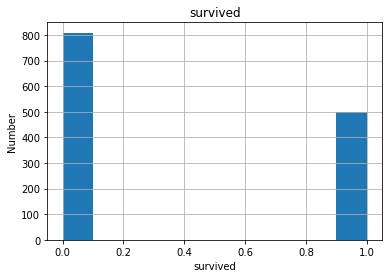

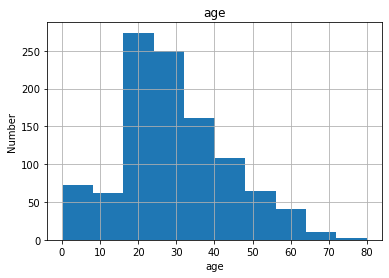

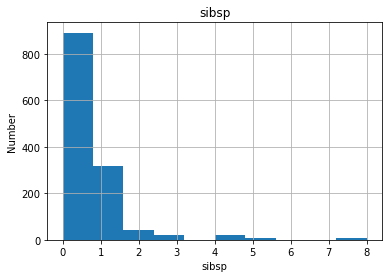

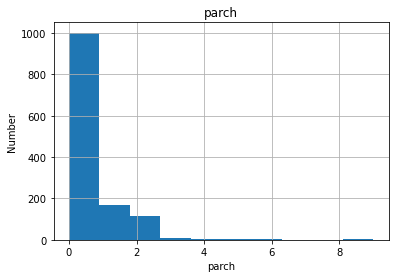

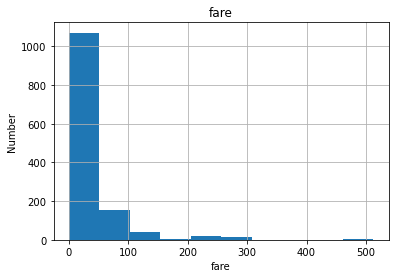

In [14]:
def analyse_continuous(df, var):
    df = df.copy()
    # df[var].hist(bins=30)
    # lcx: use default bin size, 10
    df[var].hist()
    plt.ylabel('Number')
    plt.xlabel(var)
    plt.title(var)
    plt.show()


for var in vars_num:
    analyse_continuous(data, var)

## Separate data into train and test

Use the code below for reproducibility. Don't change it.

In [15]:
X_train, X_test, y_train, y_test = train_test_split(
    data.drop('survived', axis=1),  # predictors
    data['survived'],  # target
    test_size=0.2,  # percentage of obs in test set
    random_state=0)  # seed to ensure reproducibility

X_train.shape, X_test.shape

((1047, 9), (262, 9))

## Feature Engineering

### Extract only the letter (and drop the number) from the variable Cabin

In [16]:
def extract_cabin(df):
    df["cabin"] = df["cabin"].apply(lambda x: x[0]
                                    if x is not np.nan else np.nan)
    return df
    
X_train = extract_cabin(X_train)
X_test = extract_cabin(X_test)

### Fill in Missing data in numerical variables:

- Add a binary missing indicator
- Fill NA in original variable with the median

In [19]:
for var in vars_num_na :
    
    # calculate the mode using the train set
    median_val = data[var].median() # skip the na by default
    print(var, " has median: ", median_val)

    # add binary missing indicator (in train and test)
    X_train[var+'_na'] = np.where(X_train[var].isnull(), 1, 0)
    X_test[var+'_na'] = np.where(X_test[var].isnull(), 1, 0)

    # replace missing values by the mode
    # (in train and test)
    X_train[var] = X_train[var].fillna(median_val)
    X_test[var] = X_test[var].fillna(median_val)

# check that we have no more missing values in the engineered variables
X_train[vars_num_na].isnull().sum()
    

age  has median:  28.0
fare  has median:  14.4542


age     0
fare    0
dtype: int64

### Replace Missing data in categorical variables with the string **Missing**

In [20]:
X_train[vars_cat_na] = X_train[vars_cat_na].fillna('Missing')
X_test[vars_cat_na] = X_test[vars_cat_na].fillna('Missing')

### Remove rare labels in categorical variables

- remove labels present in less than 5 % of the passengers

In [22]:
def find_frequent_labels(df, var, rare_perc):
    
    # function finds the labels that are shared by more than
    # a certain % of the houses in the dataset

    tmp = df.groupby(var)[var].count() / len(df)

    return tmp[tmp > rare_perc].index


In [23]:
for var in vars_cat:
    
    # find the frequent categories
    frequent_ls = find_frequent_labels(X_train, var, 0.05)
    
    # replace rare categories by the string "Rare"
    X_train[var] = np.where(X_train[var].isin(
        frequent_ls), X_train[var], 'Rare')
    
    X_test[var] = np.where(X_test[var].isin(
        frequent_ls), X_test[var], 'Rare')

### Perform one hot encoding of categorical variables into k-1 binary variables

- k-1, means that if the variable contains 9 different categories, we create 8 different binary variables
- Remember to drop the original categorical variable (the one with the strings) after the encoding

In [24]:
# lcx: make sure X_train and X_test have the same amoutn of 
# caterogies

for var in vars_cat:
    print(var)
    print("train: ", X_train[var].unique(), 
          " test: ", X_test[var].unique())
    print()


sex
train:  ['male' 'female']  test:  ['male' 'female']

cabin
train:  ['Missing' 'Rare' 'C']  test:  ['Missing' 'Rare' 'C']

embarked
train:  ['S' 'C' 'Q' 'Rare']  test:  ['S' 'C' 'Q']

title
train:  ['Mr' 'Miss' 'Mrs' 'Rare']  test:  ['Mr' 'Miss' 'Rare' 'Mrs']



In [27]:
# concatenate the X_tran and X_test together 
# inorder to do a correct one hot encoding
X_entire = pd.concat([X_train, X_test], axis=0, sort=False)

In [28]:
X_entire = pd.get_dummies(X_entire, columns=vars_cat, drop_first=True)

In [29]:
X_entire.head(5)

,pclass,age,sibsp,parch,fare,age_na,fare_na,sex_male,cabin_Missing,cabin_Rare,embarked_Q,embarked_Rare,embarked_S,title_Mr,title_Mrs,title_Rare
1118,3,25.0,0,0,7.9250,0,0,1,1,0,0,0,1,1,0,0
44,1,41.0,0,0,134.5000,0,0,0,0,1,0,0,0,0,0,0
1072,3,28.0,0,0,7.7333,1,0,1,1,0,1,0,0,1,0,0
1130,3,18.0,0,0,7.7750,0,0,0,1,0,0,0,1,0,0,0
574,2,29.0,1,0,21.0000,0,0,1,1,0,0,0,1,1,0,0


In [38]:
print(X_entire.shape)
X_train = X_entire.iloc[:1047,:]
X_test = X_entire.iloc[1047:,:]
print(X_train.shape)
print(X_test.shape)

(1309, 16)
(1047, 16)
(262, 16)


### Scale the variables

- Use the standard scaler from Scikit-learn

In [40]:
train_vars = [var for var in X_train.columns if var not in ['age_na', 'fare_na']]
print(train_vars)

['pclass', 'age', 'sibsp', 'parch', 'fare', 'sex_male', 'cabin_Missing', 'cabin_Rare', 'embarked_Q', 'embarked_Rare', 'embarked_S', 'title_Mr', 'title_Mrs', 'title_Rare']


In [41]:
X_train = X_train[train_vars]
X_test = X_test[train_vars]

In [42]:
from sklearn.preprocessing import MinMaxScaler

In [43]:
# create scaler
scaler = MinMaxScaler()

#  fit  the scaler to the train set
scaler.fit(X_train[train_vars]) 

# transform the train and test set
X_train.loc[:, train_vars] = scaler.transform(X_train[train_vars])

X_test.loc[:, train_vars] = scaler.transform(X_test[train_vars])

In [44]:
X_train.describe()

,pclass,age,sibsp,parch,fare,sex_male,cabin_Missing,cabin_Rare,embarked_Q,embarked_Rare,embarked_S,title_Mr,title_Mrs,title_Rare
count,1047.000000,1047.000000,1047.000000,1047.000000,1047.000000,1047.000000,1047.000000,1047.000000,1047.000000,1047.000000,1047.000000,1047.000000,1047.000000,1047.000000
mean,0.648520,0.399297,0.065544,0.042768,0.065829,0.633238,0.766953,0.158548,0.092646,0.001910,0.709647,0.569245,0.159503,0.070678
std,0.420729,0.170153,0.136927,0.093952,0.099815,0.482151,0.422974,0.365429,0.290074,0.043685,0.454142,0.495418,0.366320,0.256409
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.500000,0.309255,0.000000,0.000000,0.015412,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.376975,0.000000,0.000000,0.028213,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000
75%,1.000000,0.471783,0.125000,0.000000,0.061264,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [45]:
X_train.shape

(1047, 14)

In [46]:
X_train.to_csv('titanic_xtrain.csv', index=False)
X_test.to_csv('titanic_xtest.csv', index=False)

## Train the Logistic Regression model

- Set the regularization parameter to 0.0005
- Set the seed to 0

In [48]:
# set up the model
# remember to set the random_state / seed

lin_model = LogisticRegression(C=0.005, random_state=0)

# train the model

lin_model.fit(X_train, y_train)

lin_model.score(X_train, y_train)

0.7631327602674307

In [49]:
lin_model.coef_.size

14

## Make predictions and evaluate model performance

Determine:
- roc-auc
- accuracy

**Important, remember that to determine the accuracy, you need the outcome 0, 1, referring to survived or not. But to determine the roc-auc you need the probability of survival.**

In [62]:
pred_train = lin_model.predict(X_train)

accu_train = accuracy_score(y_train, pred_train)

# the second column as probability of predicting 1
pred_train_proba = lin_model.predict_proba(X_train)[:,1]

roc_train = roc_auc_score(y_train, pred_train_proba)

print("train roc-auc: {0:6.4f}, \
      accuracy: {1:64f}".format(roc_train, accu_train))

#roc_auc_score

# make predictions for test set
pred_test = lin_model.predict(X_test)

accu_test = accuracy_score(y_test, pred_test)

# the second column as probability of predicting 1
pred_test_proba = lin_model.predict_proba(X_test)[:,1]

roc_test = roc_auc_score(y_test, pred_test_proba)

print("test roc-auc: {0:6.4f}, \
      accuracy: {1:6.4f}".format(roc_test, accu_test))

train roc-auc: 0.8438,       accuracy:                                                         0.763133
test roc-auc: 0.8466,       accuracy: 0.7481


That's it! Well done

**Keep this code safe, as we will use this notebook later on, to build production code, in our next assignement!!**

In [64]:
print("imblance ratio")
print("train: ", y_train.sum()/len(y_train), 
      "test: ", y_test.sum()/len(y_test))

print("negative rate:")
print("train: ", 1- y_train.sum()/len(y_train), 
      "test: ", 1- y_test.sum()/len(y_test))

imblance ratio
train:  0.38204393505253104 test:  0.3816793893129771
negative rate:
train:  0.6179560649474689 test:  0.6183206106870229


In [65]:
joblib.dump(lin_model, 'lg_model.pkl')

['lg_model.pkl']